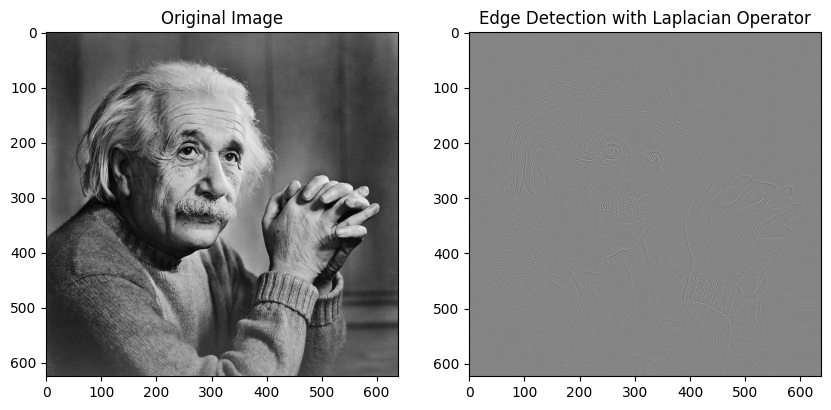

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

I = cv2.imread("Einstein.png", cv2.IMREAD_GRAYSCALE)

laplacian_kernel = np.array(
    [
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0],
    ],
    dtype=np.float32,
)

kernel_size = laplacian_kernel.shape[0]

height, width = I.shape

output = np.zeros((height - kernel_size + 1, width - kernel_size + 1), dtype=np.float32)

for i in range(kernel_size // 2, height - kernel_size // 2):
    for j in range(kernel_size // 2, width - kernel_size // 2):
        roi = I[i - kernel_size // 2 : i + kernel_size // 2 + 1, j - kernel_size // 2 : j + kernel_size // 2 + 1]
        pixel_value = np.sum(laplacian_kernel * roi)
        output[i - kernel_size // 2, j - kernel_size // 2] = pixel_value

def contrast_stretching(I):
    a = 0
    b = 255
    c = I[0, 0]
    d = I[0, 0]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i, j] < c:
                c = I[i, j]
            if I[i, j] > d:
                d = I[i, j]
    return ((I - c) * ((b - a) / (d - c))) + a

stretched_output = contrast_stretching(output)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(I, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(stretched_output, cmap="gray")
ax[1].set_title("Edge Detection with Laplacian Operator")

plt.show()
